In [1]:
import sys
import importlib as imp
if ('Jupytils' in sys.modules):
    reloaded = imp.reload(Jupytils)
else:
    import Jupytils
    from sklearn.linear_model import LinearRegression

In [21]:
fileName = "../data/Advertising.csv"
dfOriginal = LoadDataSet(fileName, columns=None, checkForDateTime=False);
dfX=dfOriginal[["TV", 'Sales']]
dfX

,TV,Sales
0,230.100,22.100
1,44.500,10.400
2,17.200,9.300
3,151.500,18.500
...,...,...
196,94.200,9.700
197,177.000,12.800
198,283.600,25.500
199,232.100,13.400


Intercept: 7.03259354913  Coeff:  [ 0.05]


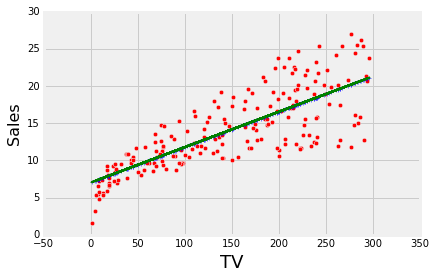

In [30]:
X=dfX[['TV']].as_matrix()
y=dfX.Sales.values

## -----
lm = LinearRegression()
lm.fit(X, y)

print ("Intercept:" , lm.intercept_, " Coeff: ", lm.coef_)

yp = lm.predict(X)

plt.scatter(X, y,  alpha=1, marker='o', s=20, c = 'r')
plt.scatter(X, yp, alpha=1, marker='+', s=20, c = 'b')
plt.plot(X, yp , color='g',linewidth=2)
plt.xlabel('TV', fontsize=18)
plt.ylabel('Sales', fontsize=16)

Lets compute P-value t- statistic and RSE as given in the ISLR book 

$$
\beta_1 =  \frac{
     \sum_{1}^{n}(x_i-\bar{x}) (y_i-\bar{y})
     }{
     \sum_{1}^{n}(x_i-\bar{x})^2}
$$


$$ RSS = \sum({y-\hat{y}})^2 $$


$$RSE = \sqrt{\frac{RSS}{n-2}}$$



In [98]:
#We know beta_1 = 0.0475 and beta_0 = 7.03

x_avg = X.mean()
y_avg = y.mean()

n = dfX.shape[0]   # Number of rows in the data

RSS1= np.sum((y-yp))  # Residual sum of squares
RSS = np.sum((y-yp)**2)  # Residual sum of squares
RSE = sqrt(RSS/(n-2))       # Residual Squared Error

ss_xv = np.sum((X-x_avg)**2)
SE_b1 = sqrt((RSE)**2/ss_xv)

SE_b0 = sqrt( RSE**2 * ( 1/n + x_avg**2 / ss_xv ))

b0 = lm.intercept_
b1 = lm.coef_
print("Intercept b0: %2.5f, %6.4f"% (b0, b1) )

print("\n X average: {}\n y average: {}\n RSS: {}\n RSE: {}\n".format(x_avg, y_avg, RSS, RSE) )
print("std err(b1):", SE_b1,
      "\n"
      "std err(b0):", SE_b0)

# To test the hypothesis b1 = 0
# t = b1 -0 / SE(b1)
t_b1 = b1 / SE_b1
t_b0 = b0 / SE_b0

print("\n", "t b0: ", t_b0 ,"\n", "t_b1:", t_b1)

Intercept b0: 7.03259, 0.0475

 X average: 147.0425
 y average: 14.0225
 RSS: 2102.5305831313512
 RSE: 3.2586563686504624

std err(b1): 0.0026906071878 
std err(b0): 0.457842940273

 t b0:  15.3602751741 
 t_b1: [ 17.67]


In [80]:
RSS1

-2.2737367544323206e-13

In [64]:
ss_xv

4.0720873709763794e-24

In [117]:
lm = LinearRegression()
lm.fit(X, y)
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X, y)))

# save intercept and coefficients
param_df = pd.DataFrame({"Features": ['intercept'] + list(boston.feature_names), "Coef": [lm.intercept_] + list(lm.coef_)})
cols = param_df.columns.tolist()
cols = cols[-1:]+cols[:-1]
param_df = param_df[cols]
display(HTML(param_df.to_html()))

The R-squared value is: 0.7406 



,Features,Coef
0,intercept,36.491
1,CRIM,-0.107
2,ZN,0.046
3,INDUS,0.021
4,CHAS,2.689
5,NOX,-17.796
6,RM,3.805
7,AGE,0.001
8,DIS,-1.476
9,RAD,0.306


In [35]:
yp

array([ 17.97,   9.15,   7.85,  14.23,  15.63,   7.45,   9.77,  12.75,   7.44,  16.53,  10.17,  17.24,   8.16,  11.67,  16.73,  16.32,  10.26,  20.41,  10.32,  14.03,  17.41,  18.32,   7.66,  17.89,   9.99,  19.53,  13.83,  18.45,  18.86,  10.39,  20.96,  12.4 ,  11.65,  19.66,  11.58,  20.85,  19.72,  10.58,   9.08,  17.87,  16.66,  15.45,  20.99,  16.87,   8.23,  15.36,  11.3 ,  18.44,  17.83,  10.21,  16.53,  11.81,  17.32,  15.71,  19.52,  16.49,   7.38,  13.51,  17.05,  17.05,   9.58,  19.45,  18.41,  11.91,  13.26,  10.31,   8.53,  13.65,  18.32,  17.34,  16.5 ,  12.25,   8.31,  13.18,  17.18,   7.84,   8.34,  12.76,   7.29,  12.55,  10.66,  18.43,  10.61,  10.28,  17.18,  16.22,  10.66,  12.29,  11.23,  12.25,  13.42,   8.39,  17.38,  18.96,  12.14,  14.8 ,  16.43,  15.82,  20.8 ,  13.46,  17.6 ,  21.12,  20.35,  15.96,  18.36,  13.59,   8.22,  11.33,   7.66,  19.17,  17.77,  18.52,  15.38,  17.  ,  10.75,  10.6 ,  13.65,  10.66,  13.01,   7.95,  13.75,   7.93,  17.68,  12.88,
 

In [118]:
newX = X
newY = y

# predict and create a dataframe
predicted = lm.predict(newX)
predictedDf = pd.DataFrame({"predicted": predicted})
# dataframe for X
newXDf = pd.DataFrame(newX)
newXDf.columns = boston.feature_names
# dataframe for y
newYDf = pd.DataFrame(newY)
newYDf.columns = ['ActualY']
# join X, y and prediction
mydata_with_pd = newXDf.join(newYDf).join(predictedDf)

display(mydata_with_pd.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ActualY,predicted
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000,30.008
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600,25.030
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700,30.570
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400,28.608
4,0.069,0.000,2.180,0.000,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,36.200,27.943


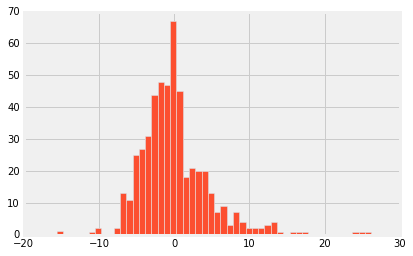

In [119]:
# I am not sure why I am plotting this
## ===========Lets make some bins depending on how far or close to real 
mydata_with_pd['diff'] = mydata_with_pd['ActualY'] - mydata_with_pd['predicted'] 
mydata_with_pd['diff'].hist(bins=50)

min = floor(mydata_with_pd['diff'].min())
max = ceil(mydata_with_pd['diff'].max())
nbins=5
bins = np.linspace(min, max, nbins, endpoint=True)
group_names = []
for i in arange(len(bins[1:])):
    group_names.append ("{} - ({} - {}] ".format(i, bins[i],  bins[i+1]))

mydata_with_pd['bins'] = pd.cut(mydata_with_pd['diff'], bins, labels=group_names)
mydata_with_pd['bins'] = mydata_with_pd['bins'].astype(str)

mydata_with_pd['diff'].hist(bins=50);

Dropping in prepareDF -  Index([], dtype='object')


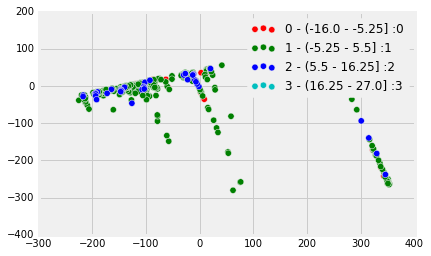

In [120]:
dfPCA=PCAPlot(mydata_with_pd, 'bins')

In [121]:
mydata_with_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ActualY,predicted,diff,bins
0,0.006,18.000,2.310,0.000,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,24.000,30.008,-6.008,0 - (-16.0 - -5.25]
1,0.027,0.000,7.070,0.000,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,21.600,25.030,-3.430,1 - (-5.25 - 5.5]
2,0.027,0.000,7.070,0.000,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,34.700,30.570,4.130,1 - (-5.25 - 5.5]
3,0.032,0.000,2.180,0.000,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,33.400,28.608,4.792,1 - (-5.25 - 5.5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.045,0.000,11.930,0.000,0.573,6.120,76.700,2.288,1.000,273.000,21.000,396.900,9.080,20.600,22.379,-1.779,1 - (-5.25 - 5.5]
503,0.061,0.000,11.930,0.000,0.573,6.976,91.000,2.167,1.000,273.000,21.000,396.900,5.640,23.900,27.629,-3.729,1 - (-5.25 - 5.5]
504,0.110,0.000,11.930,0.000,0.573,6.794,89.300,2.389,1.000,273.000,21.000,393.450,6.480,22.000,26.130,-4.130,1 - (-5.25 - 5.5]
505,0.047,0.000,11.930,0.000,0.573,6.030,80.800,2.505,1.000,273.000,21.000,396.900,7.880,11.900,22.349,-10.449,0 - (-16.0 - -5.25]


<hr/>
## More advanced view

The following topics are more advanced and you may want to review the following material after you have become familiar with the other topics. In fact, browse through the notes and not worry about it - you can do most of linear regression without having to learn this. Having said that, you will likely have to reread materials many times before everything sinks. I had to do it many many times and even now I forget it if I don't use it for more than few weeks.

We are going to use the data used by:
http://connor-johnson.com/2014/02/18/linear-regression-with-python/

This is data from a British government survey of household spending may be used to examine the relationship between household spending on tobacco products and alcholic beverages. 

'''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East Midlands 4.89 3.34
West Midlands 5.63 3.47
East Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern Ireland 4.02 4.56'''



Intercept: 4.35116848605  Coeff:  [ 0.3]


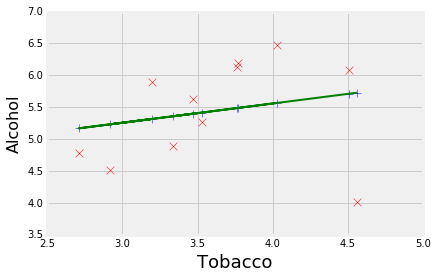

In [65]:
import sys
import importlib as imp
if ('Jupytils' in sys.modules):
    reloaded = imp.reload(Jupytils)
else:
    import Jupytils
    
data='''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
East-Midlands 4.89 3.34
West-Midlands 5.63 3.47
East-Anglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
Northern-Ireland 4.02 4.56'''

df  = LoadDataSet(data, seperator=" ");
df['Alcohol']=df.Alcohol.astype(float)
df['Tobacco']=df.Tobacco.astype(float)

X=df[['Tobacco']].as_matrix()
y=df.Alcohol.values

## -----
lm = LinearRegression()
lm.fit(X, y)

print ("Intercept:" , lm.intercept_, " Coeff: ", lm.coef_)

yp = lm.predict(h)

plt.scatter(X, y,  alpha=1, marker='x', s=60, c = 'r')
plt.scatter(X, yp, alpha=1, marker='+', s=60, c = 'b')
plt.plot(X, yp , color='g',linewidth=2)
plt.xlabel('Tobacco', fontsize=18)
plt.ylabel('Alcohol', fontsize=16)


In [68]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

result = sm.OLS( y, X ).fit()
result.summary()

/Users/snarayan/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     292.9
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           9.79e-09
Time:                        07:40:13   Log-Likelihood:                -15.595
No. Observations:                  11   AIC:                             33.19
Df Residuals:                      10   BIC:                             33.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4761      0.086     17.113      0.000         1.284     1.668
==============================================================================
Omnibus:                       17.342   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.940
Skew:                          -1.917   Prob(JB):                      0.00421
Kurtosis:                       6.028   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""